In [1]:
# Downsample data to same length as input vector

import re
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import manifold


%matplotlib inline

In [2]:
names = ['id','category']
for i in range(1,301):
    names.append(str(i))

# Load text description vectors
descriptions = pd.read_csv('data/description_vecs.csv',names=names)

In [3]:
# Downsample data 
df = descriptions

df_reduced = pd.DataFrame()
for i in range(0,len(df)):
    if (i%100==0):
        df_reduced = pd.concat([df_reduced, df[i:i+1]])

df=df_reduced

In [4]:
# Import similarity matrix
# vecs = pd.read_csv('data/similarity_matrix_100.csv', names=names[2:])

# We only need labels here 
# labs = X[X.columns[0:2]]

# Currently using first set
# labs = labs[0:len(vecs)]

In [8]:
# Perform SVM classification based on text vectors from W2V
X = df2[df2.columns[2:302]]
y = df2[df2.columns[1:2]]
c, r = y.shape
y = y.values.reshape(c,)

model = SVC()
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.22 (+/- 0.02)


In [219]:
# Perform SVM classification based on text vectors from BoW

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 800 / 800
[t-SNE] Mean sigma: 0.140798
[t-SNE] Iteration 25: error = 1.2371941, gradient norm = 0.0176719
[t-SNE] Iteration 50: error = 1.2478935, gradient norm = 0.0173073
[t-SNE] Iteration 75: error = 0.9070283, gradient norm = 0.0089201
[t-SNE] Iteration 100: error = 0.9372755, gradient norm = 0.0108432
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.937275
[t-SNE] Iteration 125: error = 0.8313601, gradient norm = 0.0034244
[t-SNE] Iteration 150: error = 0.8389698, gradient norm = 0.0056436
[t-SNE] Iteration 175: error = 0.8608899, gradient norm = 0.0063744
[t-SNE] Iteration 175: did not make any progress during the last 30 episodes. Finished.
[t-SNE] Error after 175 iterations: 0.937275


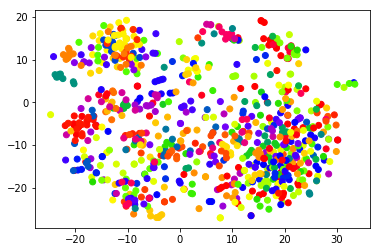

In [36]:
# T-SNE representation of w2v
X = df2[df2.columns[2:302]]
X_embedded = TSNE(n_components=2, verbose=2, metric='cosine').fit_transform(X)

y = df2[df2.columns[1:2]]
cs = pd.factorize(y.category)
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=cm.prism(cs[0])) 

In [37]:
# Try some agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
